In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('~/python_project/heart.csv')


In [5]:
# 1. Загрузка данных и проверка информации
df = pd.read_csv('heart.csv')

print("Информация о данных:")
print(df.info())
print("Расчет основных статистических показателей:")
print(df.describe())
print("\nПроверка пропусков:")
print(df.isnull().sum())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
Расчет основных статистических показателей:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  3

In [12]:
# Разделение на признаки и целевую переменную
X = df.drop('target', axis=1)
y = df['target']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y  # Стратификация для сохранения распределения классов
)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("""Разделение данных:
Данные разделены в соотношении 70/30
Применена стратификация для сохранения баланса классов
Выполнено масштабирование признаков для LR и KNN""")

Разделение данных:
Данные разделены в соотношении 70/30
Применена стратификация для сохранения баланса классов
Выполнено масштабирование признаков для LR и KNN


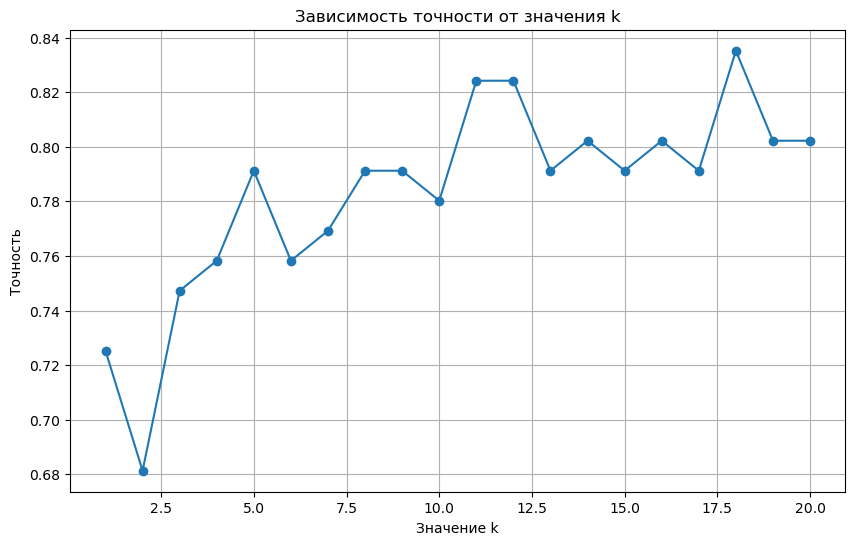

Лучшее значение k: 18
Подбор k для KNN:
Проверены значения k от 1 до 20
Визуализирована зависимость точности от k
Выбрано значение с максимальной точностью


In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Наивный Байес
nb = GaussianNB()
nb.fit(X_train, y_train)

# Логистическая регрессия
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

# Подбор оптимального k для KNN
k_range = range(1, 21)
acc_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc_scores.append(accuracy_score(y_test, y_pred))

# Визуализация результатов
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(k_range, acc_scores, marker='o')
plt.title('Зависимость точности от значения k')
plt.xlabel('Значение k')
plt.ylabel('Точность')
plt.grid(True)
plt.show()

# Выбор лучшего k
best_k = k_range[np.argmax(acc_scores)]
print(f'Лучшее значение k: {best_k}')

# Обучение KNN с лучшим параметром
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

print("""Подбор k для KNN:
Проверены значения k от 1 до 20
Визуализирована зависимость точности от k
Выбрано значение с максимальной точностью""")

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

models = {
    'Naive Bayes': nb,
    'Logistic Regression': lr,
    'KNN': knn
}

for name, model in models.items():
    if name == 'Naive Bayes':
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_scaled)
    
    y_pred = model.predict(X_test_scaled if name != 'Naive Bayes' else X_test)
    
    print(f'\n{name}:')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))


print("""Метрики качества:
Для каждой модели построена матрица ошибок
Рассчитаны precision, recall и F1-score для каждого класса
Выведен суммаризованный отчет classification_report""")


Naive Bayes:
Confusion Matrix:
[[29 12]
 [ 7 43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.71      0.75        41
           1       0.78      0.86      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.79        91
weighted avg       0.79      0.79      0.79        91


Logistic Regression:
Confusion Matrix:
[[28 13]
 [ 9 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        41
           1       0.76      0.82      0.79        50

    accuracy                           0.76        91
   macro avg       0.76      0.75      0.75        91
weighted avg       0.76      0.76      0.76        91


KNN:
Confusion Matrix:
[[31 10]
 [ 5 45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        41
           1

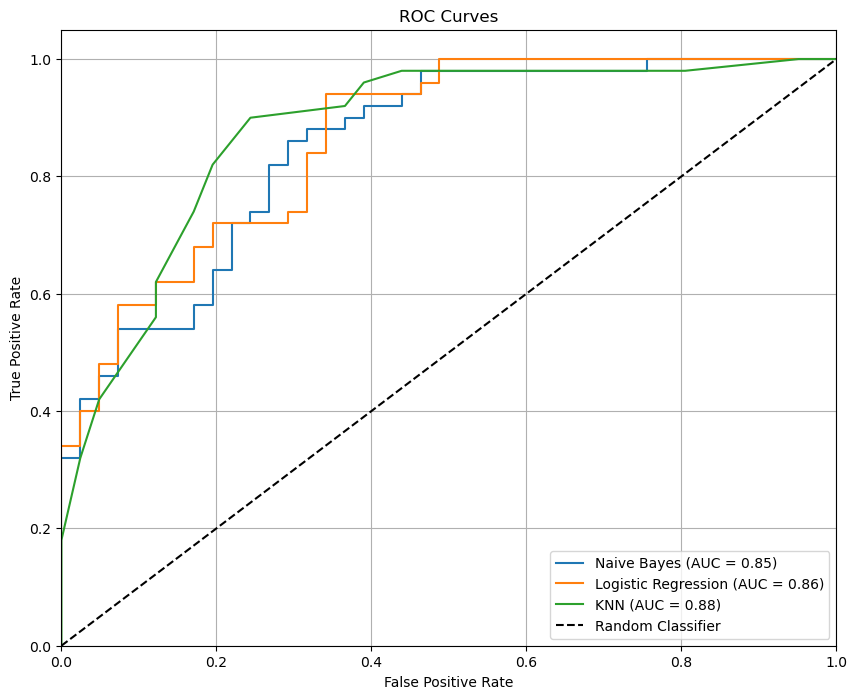

ROC-анализ:
Построены ROC-кривые для всех моделей
Рассчитаны площади под кривой (AUC)
Добавлена линия случайного классификатора для сравнения
Для интерпретации результатов обратите внимание на:

Высокий AUC (>0.8) указывает на хорошее качество классификации
Balance между precision и recall в отчете классификации
Распределение ошибок в матрицах confusion matrix
Сравнительную производительность моделей на ROC-графике


In [15]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 8))

for name, model in models.items():
    if name == 'Naive Bayes':
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.predict_proba(X_test_scaled)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show() 


print("""ROC-анализ:
Построены ROC-кривые для всех моделей
Рассчитаны площади под кривой (AUC)
Добавлена линия случайного классификатора для сравнения
Для интерпретации результатов обратите внимание на:

Высокий AUC (>0.8) указывает на хорошее качество классификации
Balance между precision и recall в отчете классификации
Распределение ошибок в матрицах confusion matrix
Сравнительную производительность моделей на ROC-графике""")